In [1]:
#import libraries off our project
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#load the dataset
df = sns.load_dataset('iris')

In [3]:
#print the first 5 rows of the dataset
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
#exploratory data analysis
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [5]:
#types of classes
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

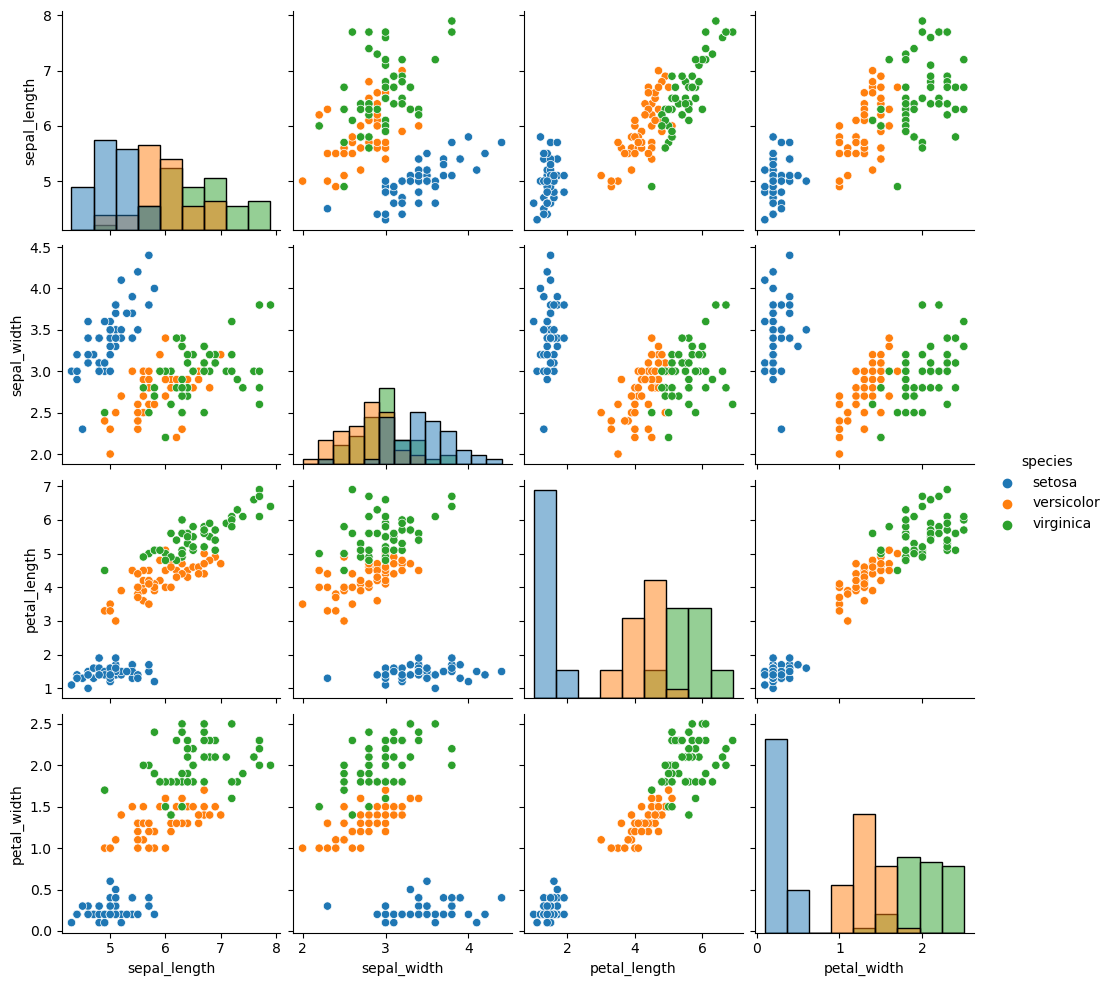

In [6]:
#generating the pairplot
sns.pairplot(df,hue='species', diag_kind='hist')

In [7]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
sns.boxplot(x=df["species"],y=df["sepal_length"],ax=ax[0][0])
sns.boxplot(x=df["species"],y=df["sepal_width"],ax=ax[0][1])
sns.boxplot(x=df["species"],y=df["petal_length"],ax=ax[1][0])
sns.boxplot(x=df["species"],y=df["petal_width"],ax=ax[1][1])

<AxesSubplot:xlabel='species', ylabel='petal_width'>

In [8]:
#features and target
X=df[['petal_length', 'petal_width']]
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
Y=df['tmp']

In [18]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=0)

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(X_train)
x_train_std

array([[ 0.94751783,  0.736072  ],
       [ 0.38491447,  0.34752959],
       [-1.30289562, -1.33615415],
       [ 0.60995581,  0.736072  ],
       [ 1.00377816,  1.25412853],
       [ 0.04735245,  0.21801546],
       [-1.19037495, -1.20664002],
       [ 0.72247648,  0.47704373],
       [ 0.21613346,  0.34752959],
       [ 0.10361279, -0.04101281],
       [ 0.94751783,  1.1246144 ],
       [-1.41541629, -1.33615415],
       [ 0.72247648,  1.38364267],
       [-1.24663528, -0.81809761],
       [-1.30289562, -1.33615415],
       [-0.1776889 , -0.30004108],
       [ 0.94751783,  0.736072  ],
       [ 1.0600385 ,  1.64267094],
       [ 0.66621615,  0.34752959],
       [ 1.11629884,  0.736072  ],
       [ 0.04735245, -0.17052694],
       [ 1.28507985,  1.38364267],
       [ 0.49743514,  0.47704373],
       [-0.00890789, -0.17052694],
       [ 0.60995581,  0.736072  ],
       [ 0.72247648,  0.34752959],
       [ 0.38491447,  0.60655786],
       [ 0.66621615,  0.86558613],
       [ 0.49743514,

In [27]:
#build model
#linearSVC (using liblinear, for large dataset liblinear)
#SVC (using libsvm, Libsvm performs very slow at 10k samples.)
from sklearn import svm
C = 1
svm_clf = svm.SVC(kernel='linear', C=C)
svm_clf.fit(x_train_std, y_train)

SVC(C=1, kernel='linear')

In [28]:
#standardize xtest
x_test_std=sc.transform(X_test)
x_test_std

array([[ 0.72247648,  1.5131568 ],
       [ 0.10361279, -0.30004108],
       [-1.35915595, -1.33615415],
       [ 1.39760052,  0.736072  ],
       [-1.30289562, -1.33615415],
       [ 1.22881951,  1.64267094],
       [-1.41541629, -1.20664002],
       [ 0.49743514,  0.34752959],
       [ 0.55369548,  0.21801546],
       [ 0.10361279,  0.08850133],
       [ 1.00377816,  0.21801546],
       [ 0.38491447,  0.34752959],
       [ 0.49743514, -0.04101281],
       [ 0.4411748 ,  0.34752959],
       [ 0.49743514,  0.21801546],
       [-1.35915595, -1.46566829],
       [ 0.38491447,  0.34752959],
       [ 0.32865413, -0.04101281],
       [-1.35915595, -1.20664002],
       [-1.41541629, -1.07712588],
       [ 0.60995581,  0.99510027],
       [ 0.38491447,  0.34752959],
       [-1.07785427, -1.33615415],
       [-1.35915595, -1.33615415],
       [ 0.55369548,  0.736072  ],
       [-1.5841973 , -1.33615415],
       [-1.07785427, -1.07712588],
       [ 0.27239379,  0.08850133],
       [-0.29020957,

In [29]:
y_test_pred=svm_clf.predict(x_test_std)
y_test_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [30]:
#evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
accuracy_score(y_test,y_test_pred)

0.9666666666666667

In [32]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [33]:
#confusion marix
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)